In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [16]:
img = cv2.imread('N:/Rice Detection/PlantVillage CrodAi-Labeled/PlantVillage-Dataset/raw/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')

In [17]:
img.shape
type(img.shape)
print(img.shape)

(256, 256, 3)


## Filtering and Convolution

In [18]:
#2D Convolution ( Image Filtering )
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

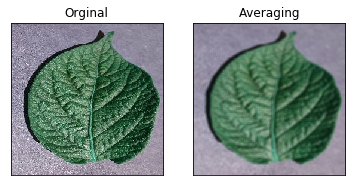

In [19]:
plt.subplot(121),plt.imshow(img),plt.title("Orginal")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

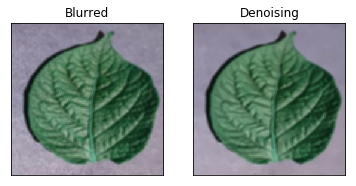

In [20]:
denoised_img = cv2.fastNlMeansDenoisingColored(dst)

plt.subplot(121),plt.imshow(dst),plt.title("Blurred")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(denoised_img),plt.title('Denoising')
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
from skimage import color, data, restoration


In [22]:
#Restore Image using Richardson-Lucy algorithm
# deconvolved_RL = restoration.richardson_lucy(dst, kernel, iterations=30)

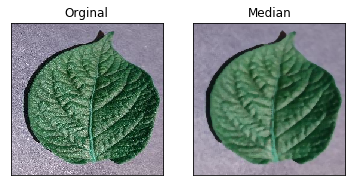

In [23]:
#Median Filtering
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title("Orginal")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

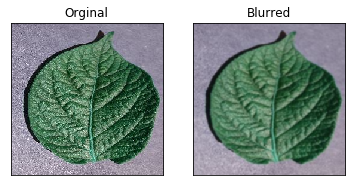

In [24]:
#Gaussian Filtering
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title("Orginal")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Contour and Shape extraction

In [25]:
img = cv2.imread('N:/Rice Detection/PlantVillage CrodAi-Labeled/PlantVillage-Dataset/raw/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')

In [26]:
#convert to grayscale
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [27]:
#DRAWING CONTOURS
img_contour = cv2.drawContours(img, contours, -1, (0,255,0), 3)


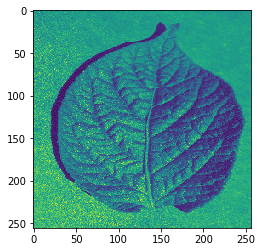

In [28]:
plt.imshow(imgray)

In [29]:
imgray.shape

(256, 256)

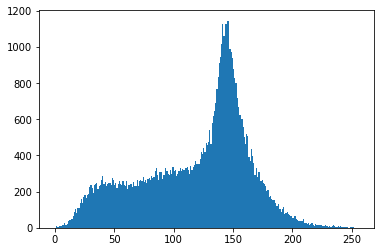

In [30]:
plt.hist(imgray.ravel(),256,[0,256]); plt.show()

### Comparing Images

In [1]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [10]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [39]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    # setup the figure
    fig = plt.figure(title)
    plt.title(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

In [40]:

# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread('N:/Rice Detection/PlantVillage CrodAi-Labeled/PlantVillage-Dataset/raw/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')
contrast = cv2.imread('N:/Rice Detection/PlantVillage CrodAi-Labeled/PlantVillage-Dataset/raw/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')
shopped = cv2.imread('N:/Rice Detection/PlantVillage CrodAi-Labeled/PlantVillage-Dataset/raw/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')
 
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
# contrast = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
Deconvolution = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
median =  cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)

error: OpenCV(3.4.4) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:255: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


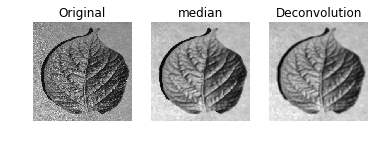

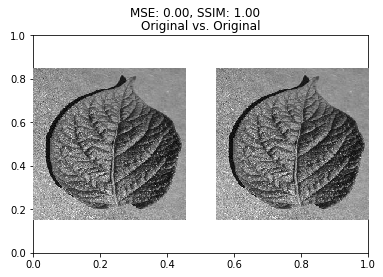

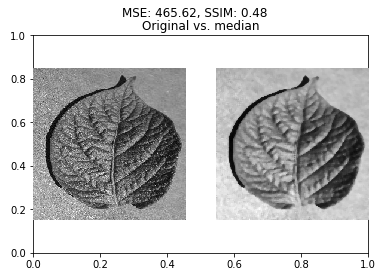

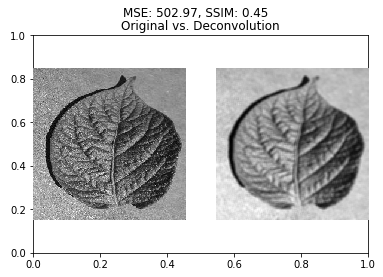

In [41]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("median", median), ("Deconvolution", Deconvolution)

# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")

# show the figure
plt.show()

# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, median, "Original vs. median")
compare_images(original, Deconvolution, "Original vs. Deconvolution")